# Data Analytics Exploratory Data Analysis for Accidents in the State of Indiana.

This analysis shows the relations between vehicular accidents and the conditions that make accidents more or less likely.

Personnel:

Data: NHTSA for the State of Indiana

Computing Resources: Personal Computer

Software: Python, Pandas, Folium, Seaborn, Matplotlib, Numpy

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


# Importing CSV File

In [ ]:
accident_data = pd.read_csv('/gdrive/My Drive/accident.csv', encoding_errors='ignore')
accident_data.head()

,STATE,STATENAME,ST_CASE,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERSONS,PERMVIT,...,NOT_MINNAME,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,FATALS
0,1,Alabama,10001,0,0,2,2,0,3,3,...,13,22,10:00pm-10:59pm,25,25,23,11:00pm-11:59pm,2,2,2
1,1,Alabama,10002,0,0,1,1,0,2,2,...,Unknown,19,7:00pm-7:59pm,9,9,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),2
2,1,Alabama,10003,1,1,1,1,0,1,1,...,29,9,9:00am-9:59am,40,40,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
3,1,Alabama,10004,0,0,1,1,0,1,1,...,20,16,4:00pm-4:59pm,28,28,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
4,1,Alabama,10005,0,0,2,2,0,4,4,...,20,22,10:00pm-10:59pm,30,30,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1


# Types of Variables and Descriptive Statistics

In [ ]:
df = accident_data.loc[accident_data['STATENAME']=="Indiana"]
df

,STATE,STATENAME,ST_CASE,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERSONS,PERMVIT,...,NOT_MINNAME,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,FATALS
14383,18,Indiana,180001,0,0,1,1,0,1,1,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
14384,18,Indiana,180002,0,0,2,2,0,6,6,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
14385,18,Indiana,180003,0,0,1,1,0,3,3,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,2
14386,18,Indiana,180004,0,0,2,2,0,3,3,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
14387,18,Indiana,180005,0,0,1,1,0,1,1,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15241,18,Indiana,180874,0,0,4,4,0,9,9,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
15242,18,Indiana,180875,1,1,1,1,0,1,1,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
15243,18,Indiana,180876,0,0,1,1,0,1,1,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
15244,18,Indiana,180877,1,1,1,1,0,1,1,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1


In [ ]:
df.columns

Index(['STATE', 'STATENAME', 'ST_CASE', 'PEDS', 'PERNOTMVIT', 'VE_TOTAL',
       'VE_FORMS', 'PVH_INVL', 'PERSONS', 'PERMVIT', 'COUNTY', 'COUNTYNAME',
       'CITY', 'CITYNAME', 'MONTH', 'MONTHNAME', 'DAY', 'DAYNAME', 'DAY_WEEK',
       'DAY_WEEKNAME', 'YEAR', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME',
       'TWAY_ID', 'TWAY_ID2', 'ROUTE', 'ROUTENAME', 'RUR_URB', 'RUR_URBNAME',
       'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER', 'RD_OWNERNAME', 'NHS',
       'NHSNAME', 'SP_JUR', 'SP_JURNAME', 'MILEPT', 'MILEPTNAME', 'LATITUDE',
       'LATITUDENAME', 'LONGITUD', 'LONGITUDNAME', 'HARM_EV', 'HARM_EVNAME',
       'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME', 'RELJCT2',
       'RELJCT2NAME', 'TYP_INT', 'TYP_INTNAME', 'REL_ROAD', 'REL_ROADNAME',
       'WRK_ZONE', 'WRK_ZONENAME', 'LGT_COND', 'LGT_CONDNAME', 'WEATHER',
       'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR',
       'NOT_HOURNAME', 'NOT_MIN', 'NOT_MINNAME', 'ARR_HOUR', 'ARR_HOURNAME',
       'ARR_M

In [ ]:
df.shape

(863, 80)

In [ ]:
df.dtypes

STATE           int64
STATENAME      object
ST_CASE         int64
PEDS            int64
PERNOTMVIT      int64
                ...  
HOSP_HR         int64
HOSP_HRNAME    object
HOSP_MN         int64
HOSP_MNNAME    object
FATALS          int64
Length: 80, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 14383 to 15245
Data columns (total 80 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATE         863 non-null    int64  
 1   STATENAME     863 non-null    object 
 2   ST_CASE       863 non-null    int64  
 3   PEDS          863 non-null    int64  
 4   PERNOTMVIT    863 non-null    int64  
 5   VE_TOTAL      863 non-null    int64  
 6   VE_FORMS      863 non-null    int64  
 7   PVH_INVL      863 non-null    int64  
 8   PERSONS       863 non-null    int64  
 9   PERMVIT       863 non-null    int64  
 10  COUNTY        863 non-null    int64  
 11  COUNTYNAME    863 non-null    object 
 12  CITY          863 non-null    int64  
 13  CITYNAME      863 non-null    object 
 14  MONTH         863 non-null    int64  
 15  MONTHNAME     863 non-null    object 
 16  DAY           863 non-null    int64  
 17  DAYNAME       863 non-null    int64  
 18  DAY_WEEK      863 non-nu

In [ ]:
df.head(5)

,STATE,STATENAME,ST_CASE,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERSONS,PERMVIT,...,NOT_MINNAME,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,FATALS
14383,18,Indiana,180001,0,0,1,1,0,1,1,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
14384,18,Indiana,180002,0,0,2,2,0,6,6,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
14385,18,Indiana,180003,0,0,1,1,0,3,3,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,2
14386,18,Indiana,180004,0,0,2,2,0,3,3,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
14387,18,Indiana,180005,0,0,1,1,0,1,1,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1


# Missing Data

In [ ]:
df.isnull().sum()

STATE          0
STATENAME      0
ST_CASE        0
PEDS           0
PERNOTMVIT     0
              ..
HOSP_HR        0
HOSP_HRNAME    0
HOSP_MN        0
HOSP_MNNAME    0
FATALS         0
Length: 80, dtype: int64

In [ ]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(df)

Your selected dataframe has 80 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
TWAY_ID2,626,72.5


# Dropping Missing Values

In [ ]:
missing_df = missing_values_table(df)
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 80 columns.
There are 1 columns that have missing values.
We will remove 1 columns.


In [ ]:
df = df.drop(list(missing_columns), axis=1)

# Univariate and Bivariate Analysis

#columns to be analyzed in this dataset
1. Weather condition
2. County
3. Time of the accidents(HRS)
4. Accidents by month
5. Number of Vehicles involved in the accidents
6. Number of Pedestrians involved in the accidents
7. Accidents by Route


Also the heatmap of the accidents is displayed at the end

In [ ]:
accident_by_weather = df.WEATHERNAME.value_counts()
accident_by_weather[:9]

Clear                624
Cloudy               144
Rain                  63
Snow                  15
Fog, Smog, Smoke      10
Not Reported           5
Blowing Snow           1
Severe Crosswinds      1
Name: WEATHERNAME, dtype: int64

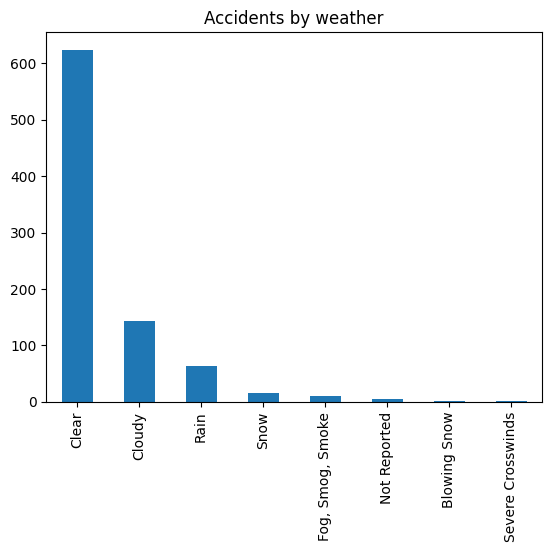

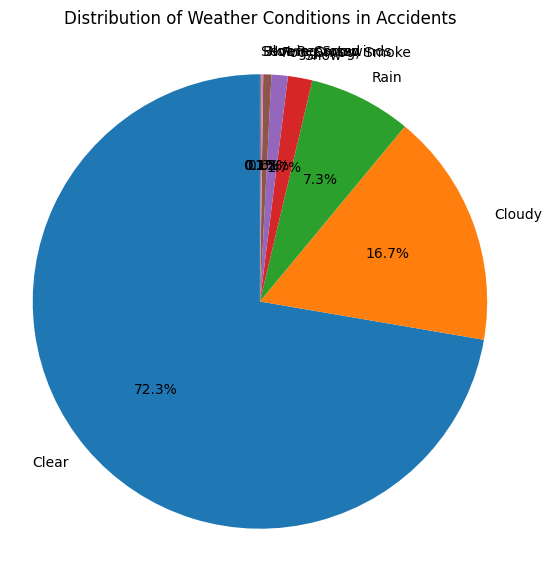

In [ ]:
df['WEATHERNAME'].value_counts().plot.bar(title = 'Accidents by weather')

#count the number of accidents by weather conditions
lgt_counts = df['LGT_CONDNAME'].value_counts()
weather_counts = df['WEATHERNAME'].value_counts()



# Pie chart for Accident by Weather Conditions
plt.figure(figsize=(6.45, 7))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Weather Conditions in Accidents')
plt.axis('equal')
plt.show()

In [ ]:
accident_counties = df.COUNTYNAME.value_counts()
accident_counties[:50]

MARION (97)          141
LAKE (89)             65
ALLEN (3)             42
ST. JOSEPH (141)      30
MADISON (95)          29
ELKHART (39)          26
HAMILTON (57)         18
VANDERBURGH (163)     18
LA PORTE (91)         17
BARTHOLOMEW (5)       17
PORTER (127)          17
DELAWARE (35)         16
KOSCIUSKO (85)        14
GRANT (53)            14
TIPPECANOE (157)      14
MONROE (105)          13
HOWARD (67)           12
MORGAN (109)          12
VIGO (167)            12
HENDRICKS (63)        11
HENRY (65)            11
WHITE (181)           10
CLINTON (23)          10
HUNTINGTON (69)        9
SCOTT (143)            8
NOBLE (113)            8
CLAY (21)              8
LAGRANGE (87)          8
BOONE (11)             8
STARKE (149)           8
SPENCER (147)          7
FAYETTE (41)           7
JENNINGS (79)          7
MARSHALL (99)          7
SHELBY (145)           7
HANCOCK (59)           7
JOHNSON (81)           7
CLARK (19)             7
WARRICK (173)          7
SULLIVAN (153)         6


<Axes: title={'center': 'CASES BY COUNTY'}>

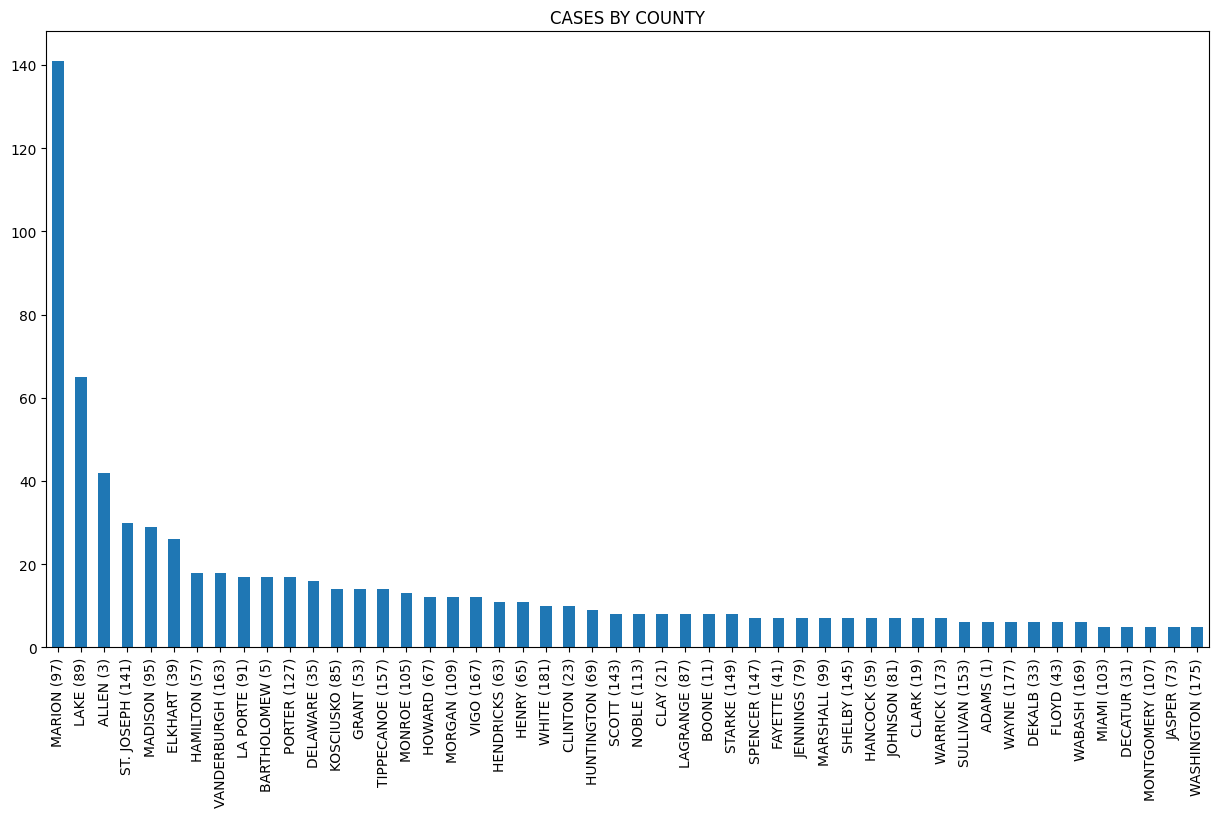

In [ ]:
plt.figure(figsize=[15,8])
df['COUNTYNAME'].value_counts()[:50].plot.bar(title='CASES BY COUNTY')

In [ ]:
accident_by_hour = df.HOUR.value_counts()
accident_by_hour[:25]

17    59
21    47
19    46
18    46
20    45
15    43
16    41
22    41
13    39
23    39
14    37
11    34
0     33
6     32
7     32
9     32
4     30
5     30
10    29
12    28
1     28
2     27
8     24
3     21
Name: HOUR, dtype: int64

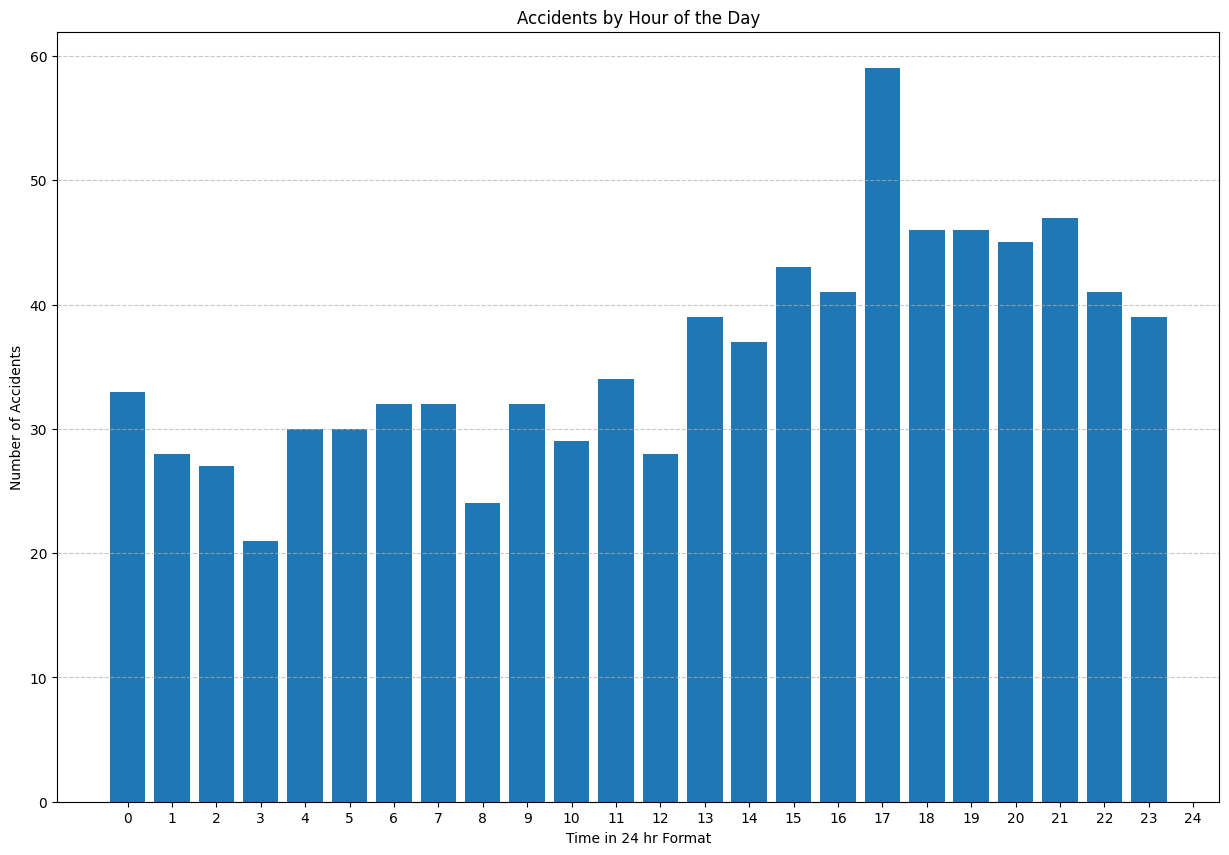

In [ ]:
df['HOUR'] = df['HOUR'].astype(int)

# Group the data by 'hour' and count the number of accidents at each hour
hourly_accident_counts = df['HOUR'].value_counts().sort_index()

# Bar chart
plt.figure(figsize=(15, 10))
plt.bar(hourly_accident_counts.index, hourly_accident_counts.values)
plt.title('Accidents by Hour of the Day')
plt.xlabel('Time in 24 hr Format')
plt.ylabel('Number of Accidents')
plt.xticks(range(25))  # 24 hrs format
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
accident_month = df.MONTHNAME.value_counts()
accident_month[:13]

August       96
September    87
May          81
June         81
July         77
October      77
November     73
January      69
April        67
December     62
March        53
February     40
Name: MONTHNAME, dtype: int64

<Axes: title={'center': 'ACCIDENTS BY MONTH'}>

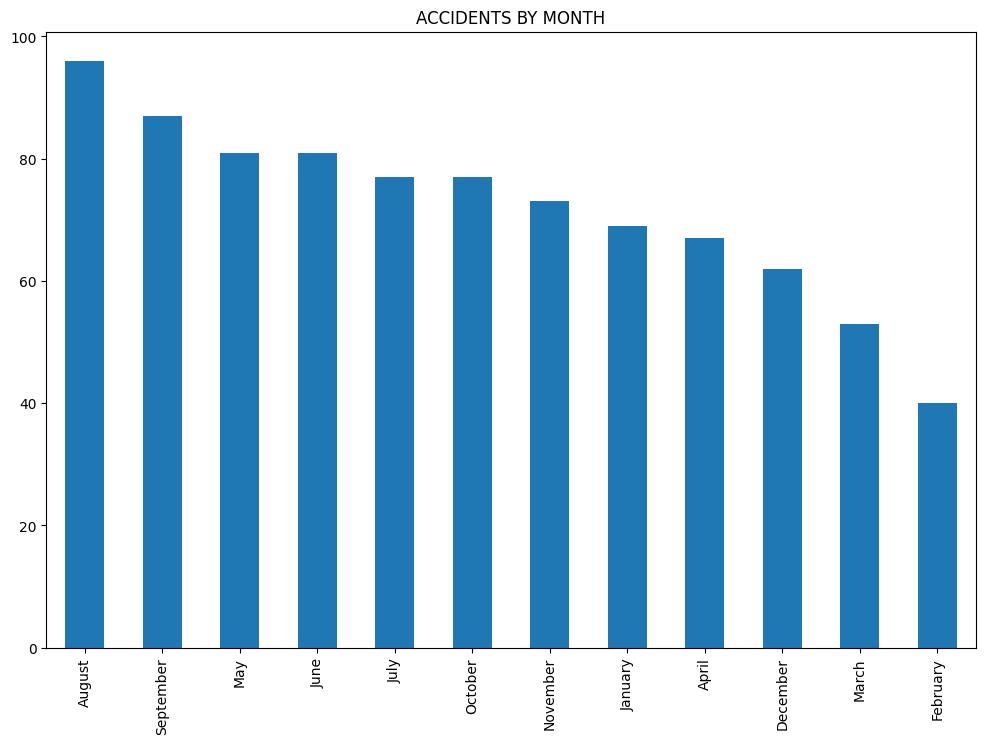

In [ ]:
plt.figure(figsize=[12,8])
df['MONTHNAME'].value_counts().plot.bar(title='ACCIDENTS BY MONTH')

In [ ]:
vehicles_per_accidents = df.VE_TOTAL.value_counts()
vehicles_per_accidents[:9]

1    428
2    346
3     69
4     14
6      3
5      2
8      1
Name: VE_TOTAL, dtype: int64

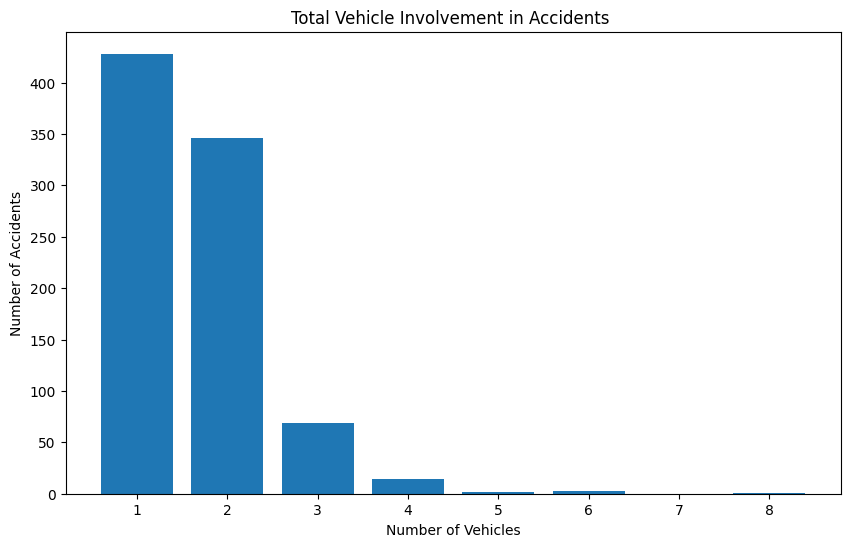

In [ ]:
# Count the number of Vehicles involved in accidents
ve_total_counts = df['VE_TOTAL'].value_counts().sort_index()

# Create a bar chart for number of vehicles
plt.figure(figsize=(10, 6))
plt.bar(ve_total_counts.index, ve_total_counts.values, align='center')
plt.title('Total Vehicle Involvement in Accidents ')
plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Accidents')
plt.show()

In [ ]:
peds_per_accident= df.PEDS.value_counts()
peds_per_accident[:4]

0    725
1    131
2      6
3      1
Name: PEDS, dtype: int64

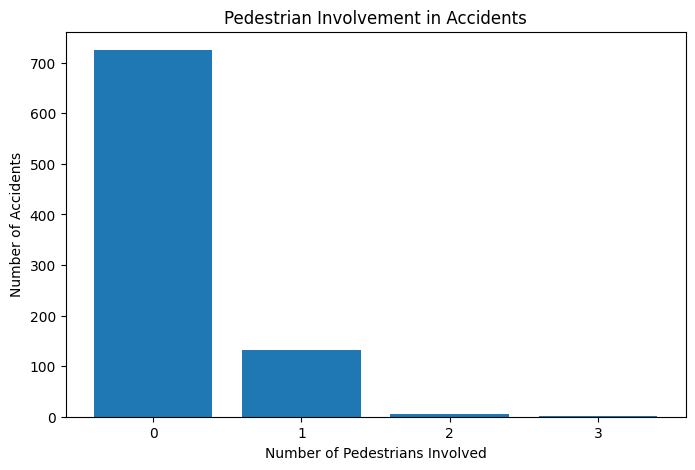

In [ ]:
# Number of pedestrians involved in accidents
pedestrians_count = df['PEDS'].value_counts().sort_index()

# Create a bar graph for number of pedestrians involved
plt.figure(figsize=(8, 5))
plt.bar(pedestrians_count.index, pedestrians_count.values, align='center')
plt.title('Pedestrian Involvement in Accidents')
plt.xlabel('Number of Pedestrians Involved')
plt.ylabel('Number of Accidents')
plt.xticks(pedestrians_count.index)
plt.show()

In [ ]:
accident_by_routes = df.ROUTENAME.value_counts()
accident_by_routes[:8]

Local Street - Municipality    257
State Highway                  194
County Road                    141
U.S. Highway                   122
Interstate                      98
Local Street - Township         49
Other                            2
Name: ROUTENAME, dtype: int64

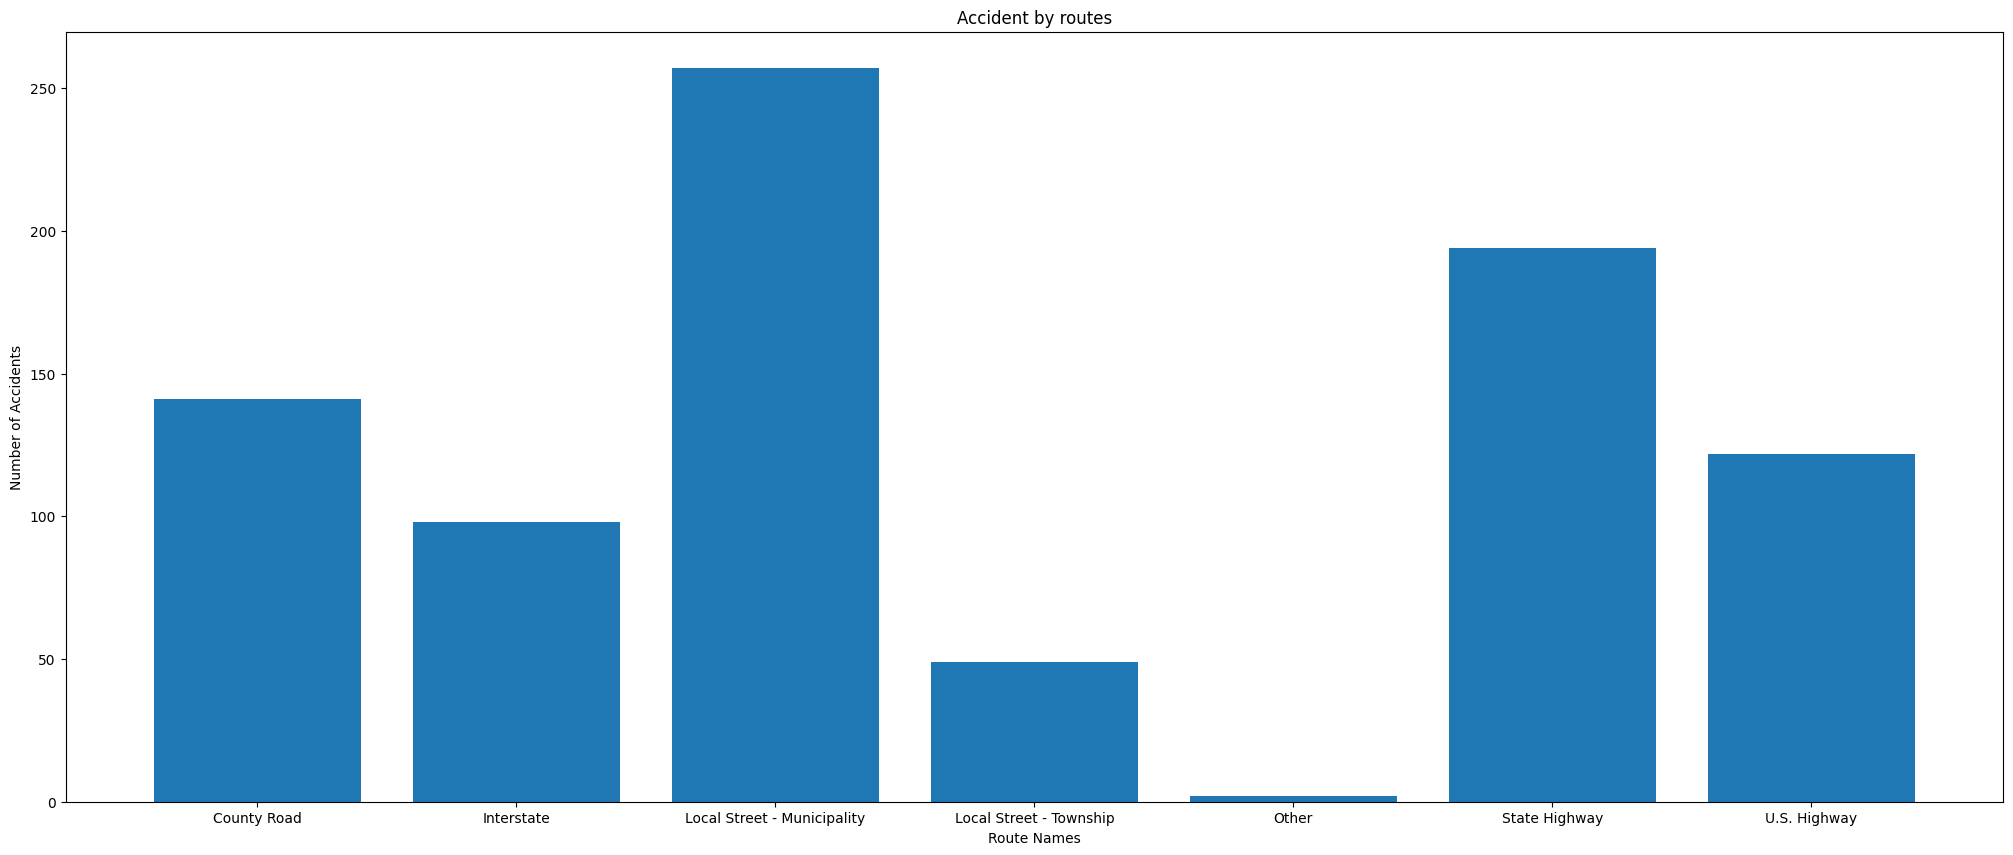

In [ ]:
# Count of total accidents by route
route_count = df['ROUTENAME'].value_counts().sort_index()

# Create a bar graph for accident by routes
plt.figure(figsize=(25, 10))
plt.bar(route_count.index, route_count.values, align='center')
plt.title('Accident by routes')
plt.xlabel('Route Names')
plt.ylabel('Number of Accidents')
plt.xticks(route_count.index)
plt.show()

In [ ]:
accident_by_days = df.DAY_WEEKNAME.value_counts()
accident_by_days[:8]

Saturday     156
Friday       147
Tuesday      132
Sunday       127
Thursday     111
Monday       100
Wednesday     90
Name: DAY_WEEKNAME, dtype: int64

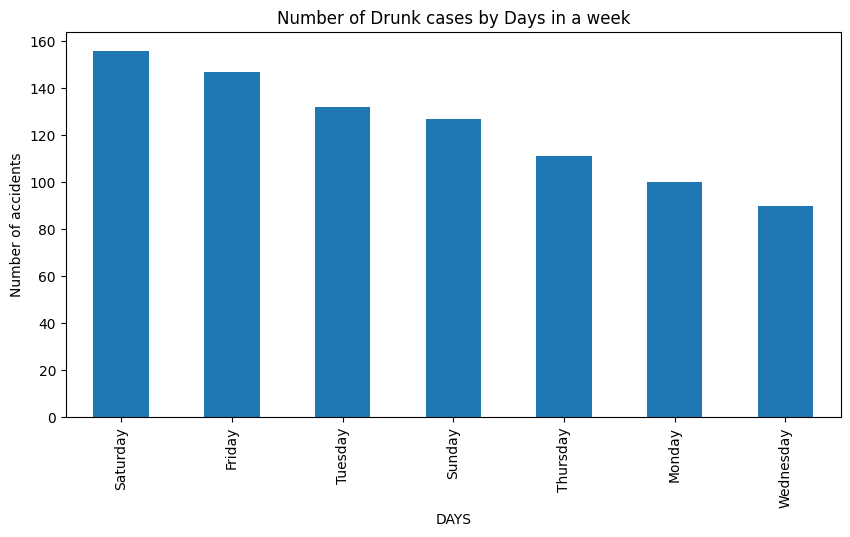

In [ ]:
df.DAY_WEEKNAME.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Number of Drunk cases by Days in a week")
plt.ylabel('Number of accidents')
plt.xlabel('DAYS');

In [ ]:
import folium

In [ ]:
from folium.plugins import HeatMap

In [ ]:
lat_lon_pairs = list(zip(list(df.LATITUDE), list(df.LONGITUD)))

In [ ]:
Hmap = folium.Map()
HeatMap(lat_lon_pairs).add_to(Hmap)
Hmap

# Summary of Analysis

In this analysis, I used a combination of distributions, visualizatoins, and descriptive analyses in order to better understand vehicular accidents in Indiana. I was able to find the correlations betweeen how weather may affect an accident, the times of day accidents were most frequent, how often accidents occured, as well as other information.  

# Conclusion

This Exploratory Data Analysis was incredibly informative in helping me understand how to make an analysis from scratch and what tools were most effective in making an analysis useful by asking important questions and using my knowledge to answer the questions.

# **Insights:**

  The most frequently occuring accidents happen in Marion , which is surprisingly one of the smallest cities in Indiana
  Also Most of the accidents happened during a clear weather with almost no pedestrians involved in most of the accident cases.

Accidents mostly  happened during evening. This is more than likely because people are traveling back home from work during those hours. To continue, accidents mainly happened in the local routes than the highway.

Also the most accident cases were during the weekends and that might be cause people usually leave for a short trip or also because people drink and drive mostly in the weekends due to parties.
